<a href="https://colab.research.google.com/github/celinka12/Data-Mining/blob/main/%5BQuestion%5D_Exercise_Week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Library

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [114]:
#1
data = pd.read_csv('https://raw.githubusercontent.com/celinka12/dataset_DM/refs/heads/main/bread%20basket.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [115]:
#2 info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
#3 check missing values
data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

the overview is for reveal the info about dataset which is the data type and check for the missing values for dataset that has been run


### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-117-b8f458faa504>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date_time']).dt.date
<ipython-input-117-b8f458faa504>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['hour'] = pd.to_datetime(data['date_time']).dt.hour


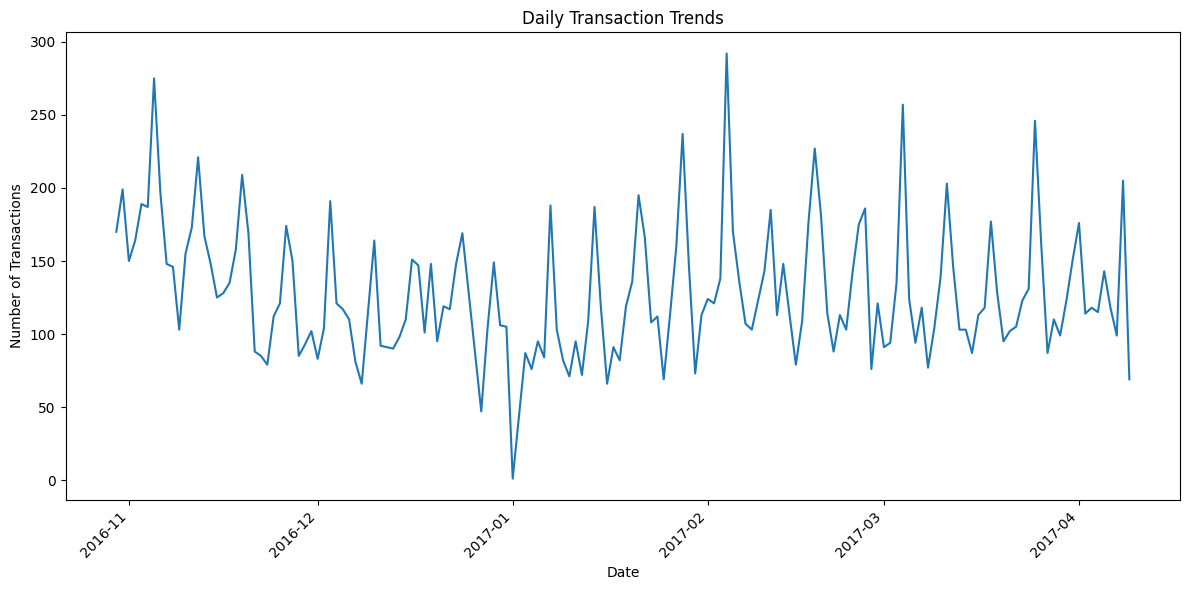

In [117]:
# 5
data['date'] = pd.to_datetime(data['date_time']).dt.date
data['hour'] = pd.to_datetime(data['date_time']).dt.hour

# Group by date and count transactions
daily_transactions = data.groupby('date')['Transaction'].count().reset_index()

# Plotting the daily transaction trends
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['date'], daily_transactions['Transaction'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [118]:
# 6
data['date_time'] = pd.to_datetime(data['date_time'])
data['day'] = data['date_time'].dt.day  # Use dt.day to access the day of the month
data['month'] = data['date_time'].dt.month # Use dt.month to access the month
data['year'] = data['date_time'].dt.year  # Use dt.year to access the year
data['time'] = data['date_time'].dt.time  # Use dt.time to access the time
data['hour'] = data['date_time'].dt.hour  # Use dt.hour to access the hour
data['day_name'] = data['date_time'].dt.day_name()  # Use dt.day_name() to access the day name

# Display the DataFrame
data[['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend', 'day', 'month', 'year', 'time', 'hour', 'day_name']].sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-118-e82bb4051d90>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time'] = pd.to_datetime(data['date_time'])


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
7750,3906,Cake,2016-12-28 13:53:00,afternoon,weekday,28,12,2016,13:53:00,13,Wednesday
10503,5247,Vegan mincepie,2017-01-24 11:36:00,morning,weekday,24,1,2017,11:36:00,11,Tuesday
15245,7294,Coke,2017-02-27 12:18:00,afternoon,weekday,27,2,2017,12:18:00,12,Monday
6009,2996,Bread,2016-12-11 12:00:00,afternoon,weekend,11,12,2016,12:00:00,12,Sunday
20123,9499,Cookies,2017-04-06 16:03:00,afternoon,weekday,6,4,2017,16:03:00,16,Thursday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


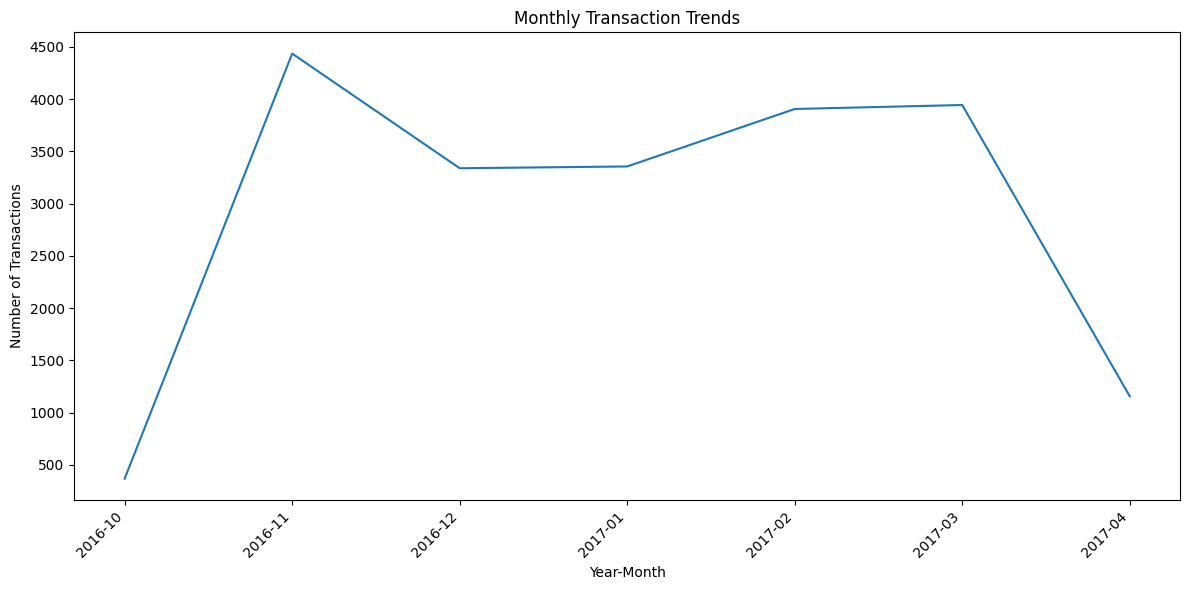

In [119]:
# 7

data['Year_Month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

monthly_transactions = data.groupby('Year_Month')['Transaction'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['Year_Month'], monthly_transactions['Transaction'])
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transaction Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

The visualization highlights monthly transaction patterns, with a notable spike in November 2016, potentially driven by promotions or holiday shopping. Transaction volumes dipped in December but leveled out from January to March 2017. However, April 2017 experienced a sharp decline, which may be attributed to seasonal factors or lower consumer demand, reflecting evident seasonality and the influence of marketing efforts.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [120]:
#9

weekday_names = data[data['weekday_weekend'] == 'weekday']['day_name'].unique()
print("Unique weekday names:", weekday_names)
weekend_names = data[data['weekday_weekend'] == 'weekend']['day_name'].unique()
print("Unique weekend names:",weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [121]:
#10
transaction_table = data.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_table = transaction_table[days_order]

display(transaction_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329.0,474.0,322.0,399.0,489.0,807.0,536.0
2,474.0,429.0,419.0,456.0,599.0,879.0,650.0
3,379.0,433.0,459.0,557.0,674.0,883.0,559.0
4,118.0,115.0,143.0,118.0,99.0,381.0,183.0
10,199.0,0.0,0.0,0.0,0.0,0.0,170.0
11,469.0,599.0,576.0,591.0,639.0,879.0,683.0
12,356.0,342.0,402.0,525.0,624.0,776.0,314.0


11. Wow, it turns out the insight that can be gained from the table above is _____

The data reveals that weekends, especially Saturdays, consistently experience the highest levels of activity throughout most months, indicating that Saturdays are peak days. Sundays also show strong performance in some months. Weekday trends vary, with certain days like Tuesdays and Fridays standing out during months such as January and November. A clear seasonal trend is evident, with higher activity observed in months like March and November, while April shows a noticeable decline across all days. Additionally, October has limited data, with only Sunday activity recorded, suggesting potential gaps in data collection or a period of reduced operations. Overall, the patterns highlight significant weekend surges, providing valuable insights for optimizing staffing, planning, or targeted strategies during peak times.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


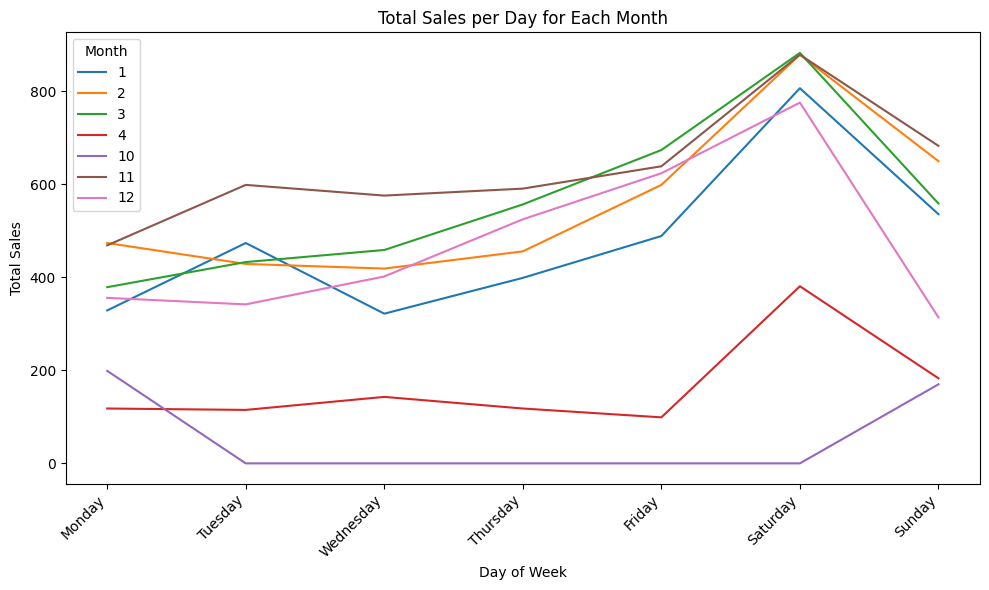

In [122]:
# 12
# Create the transaction table
transaction_table = data.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_table = transaction_table[days_order]
transaction_table = transaction_table.astype(int)

# Transpose the table for the desired plot
transaction_table = transaction_table.T
transaction_table.plot(kind='line', figsize=(10, 6))
plt.title('Total Sales per Day for Each Month')
plt.xlabel('Day of Week')  # Changed x-axis label
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Month')  # Changed legend title
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

By examining these sales trends, that transactions are consistently higher on weekends, especially Saturdays, while weekdays show more fluctuation. There are seasonal patterns, such as increased activity in November, and some months, like October, show significant drops, possibly due to data issues or operational changes. This information helps better plan promotions, staffing schedules, and resource management, allowing to adjust strategies based on days or months with higher or lower transaction volumes.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [123]:
# 14
days_name = data['period_day'].unique()
print(days_name)

['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [124]:
# 15
hour_ranges = data.groupby('period_day')['hour'].unique()
print(hour_ranges)

period_day
afternoon    [12, 13, 14, 15, 16]
evening          [17, 18, 19, 20]
morning      [9, 10, 11, 8, 7, 1]
night                [21, 23, 22]
Name: hour, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Something odd in the results: the hour `1` (which corresponds to 1:00 AM) is categorized under the "morning" period. This is incorrect because 1:00 AM is clearly part of the "night" period, not morning. The issue likely stems from the classification logic for `period_day`, which isn't correctly distinguishing between morning and night hours. To fix this, we need to ensure that hours are properly categorized, such as defining morning as 6 AM to 11 AM, afternoon as 12 PM to 5 PM, evening as 6 PM to 9 PM, and night as 10 PM to 5 AM.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


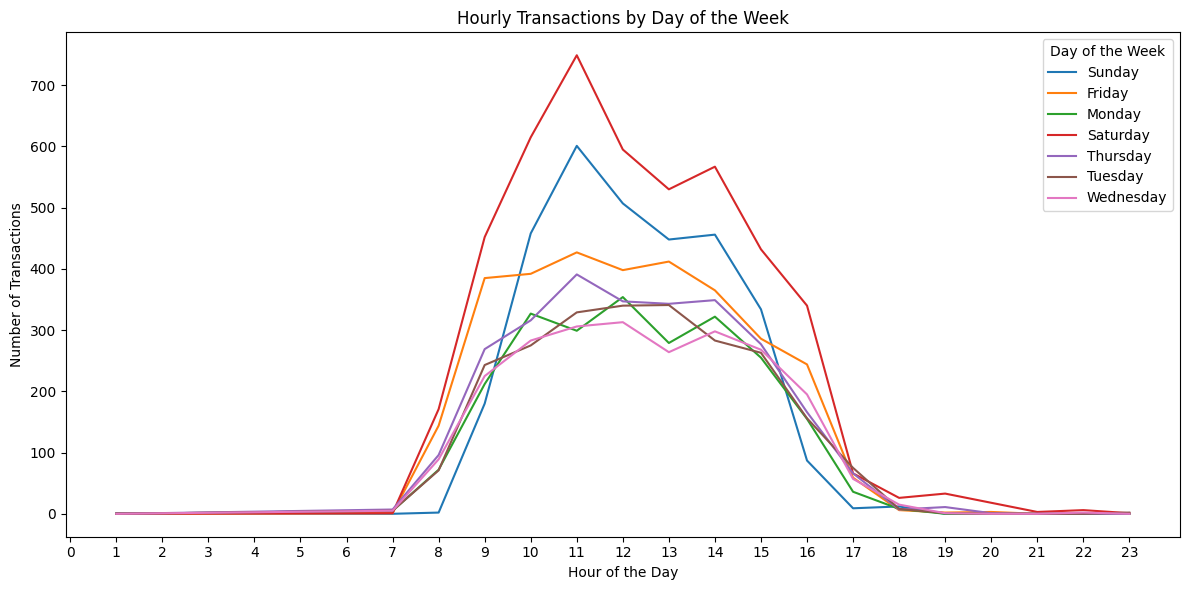

In [125]:
# 17
import matplotlib.pyplot as plt

# Group by 'day_name' and 'hour' to get the number of transactions
hourly_transactions = data.groupby(['day_name', 'hour']).size().unstack(fill_value=0)

# Sort days of the week for proper ordering
ordered_days = ['Sunday','Friday','Monday',  'Saturday', 'Thursday', 'Tuesday', 'Wednesday', ]
hourly_transactions = hourly_transactions.reindex(ordered_days)

# Plotting the hourly transactions for each day of the week
plt.figure(figsize=(12, 6))

for day in ordered_days:
    plt.plot(hourly_transactions.columns, hourly_transactions.loc[day], label=day)

# Adding titles and labels
plt.title('Hourly Transactions by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.legend(title='Day of the Week')
# plt.grid(True)
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that _______

The daily sales trend shows a clear and consistent pattern throughout the week. Transactions begin to rise in the morning, starting around 8 AM, with a noticeable surge from late morning to early afternoon (10 AM to 2 PM). After that, sales steadily decline, with a significant drop after 4 PM.

Saturday stands out as the day with the highest transaction volume, making it the busiest day. Sunday and Friday also experience relatively high peaks, while midweek days such as Tuesday and Wednesday show more moderate sales. This pattern emphasizes the need to allocate more resources during peak hours, particularly on weekends.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


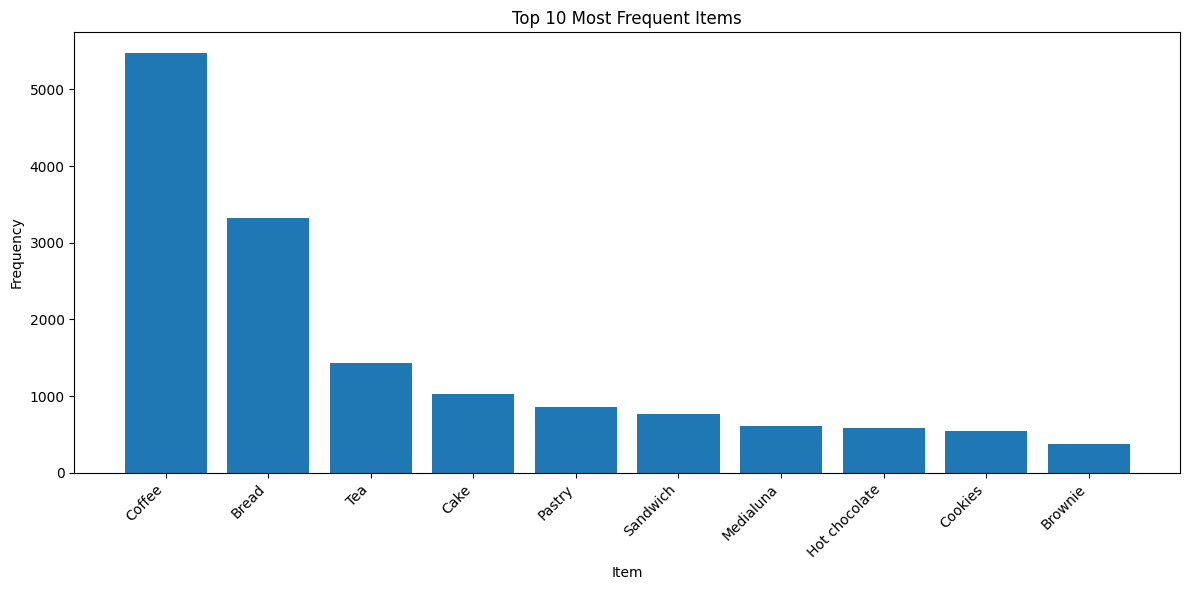

In [126]:
# 19
# Group by item and count occurrences
item_frequency = data.groupby('Item')['Transaction'].count().reset_index()
item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

# Create a bar plot for the top 10 items
plt.figure(figsize=(12, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-127-91ad5b066a26>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


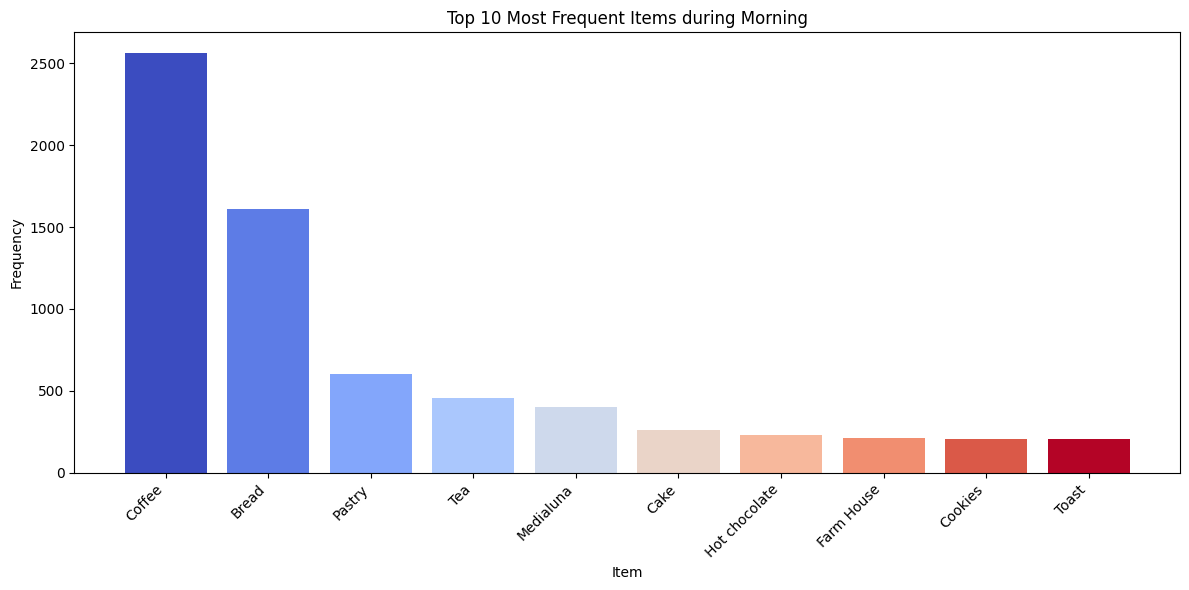

<ipython-input-127-91ad5b066a26>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


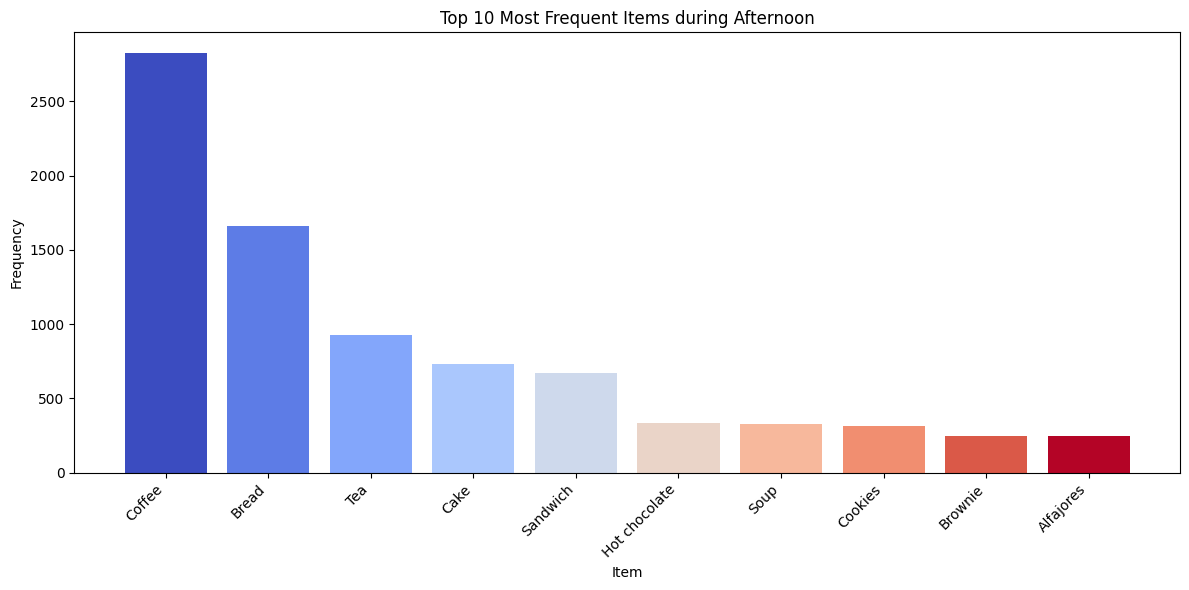

<ipython-input-127-91ad5b066a26>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


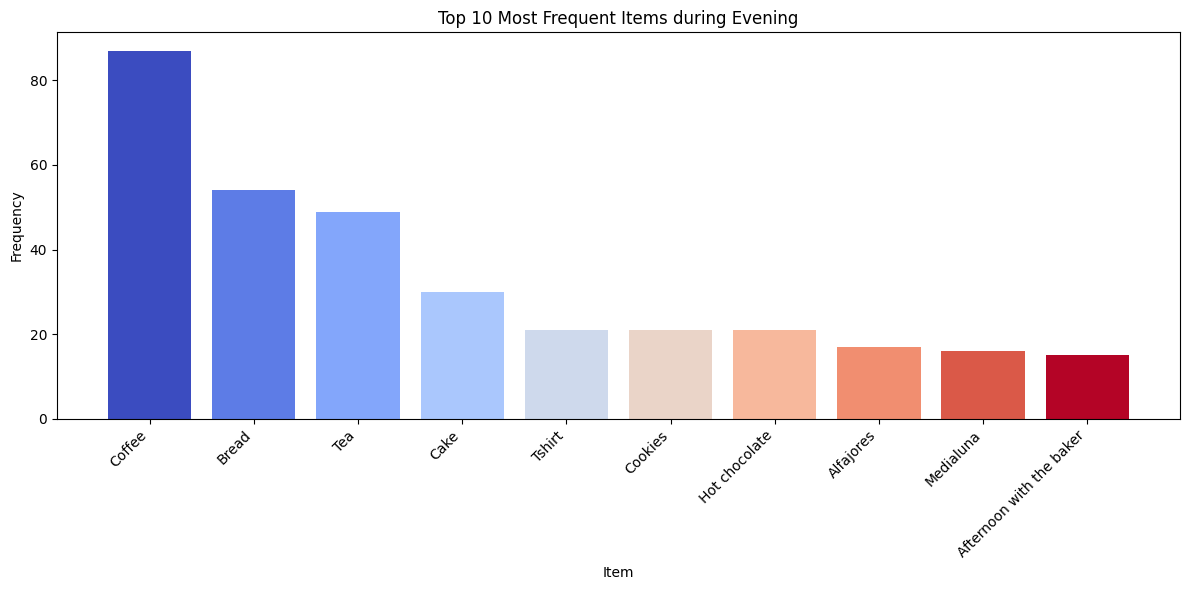

<ipython-input-127-91ad5b066a26>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


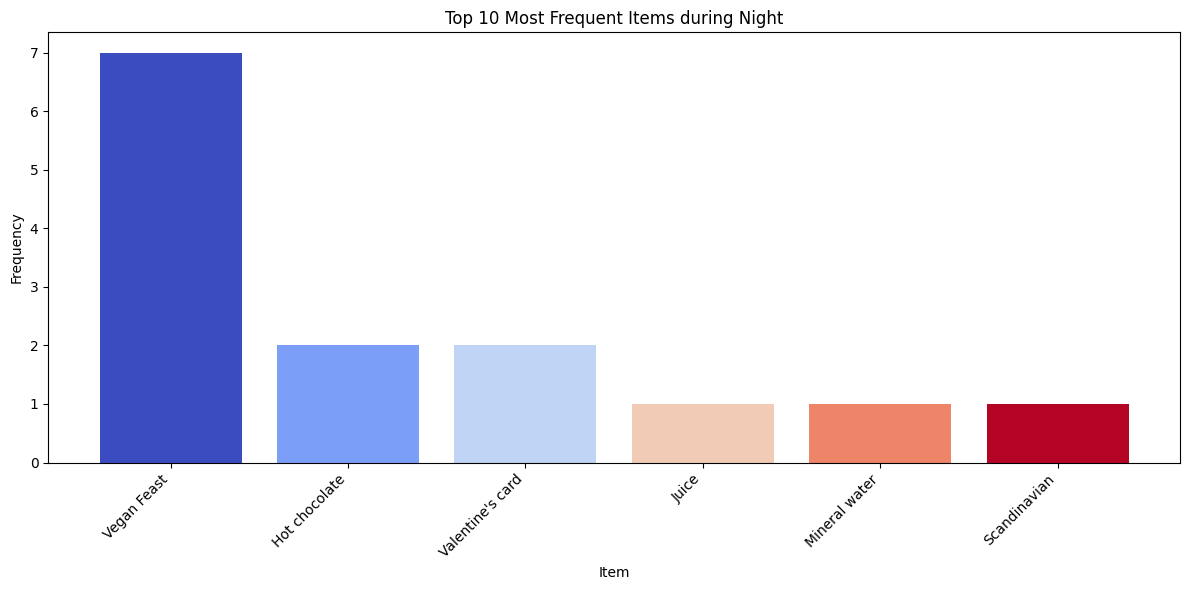

In [127]:
# 20
import matplotlib.cm as cm
import pandas as pd # import pandas to read data

def plot_top_items_by_period(period):
    # Filter data for the specified period
    period_data = data[data['period_day'] == period]

    # Group by item and count occurrences for the period
    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

    # Create a bar plot for the top 10 items in the period
    plt.figure(figsize=(12, 6)) # Fixed indentation here
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10),
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Items during {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot for each period
for period in data['period_day'].unique():
    plot_top_items_by_period(period)

21. It turns out that there is something different in the plot above, the insight is ____


The insight is that each time period—morning, afternoon, evening, and night—reveals distinct trends in the frequency of sold items, highlighting how consumer behavior changes throughout the day. For instance, during the morning, items like coffee or breakfast-related products might be more popular, reflecting people's routines and preferences early in the day. In the afternoon, snack items or beverages may see a rise in demand, as people look for energy boosts or small meals. As the evening sets in, the popularity of dinner-related items or more substantial snacks might increase, especially as people wind down after work. At night, certain types of comfort food or late-night snack items might dominate sales. This variation indicates that different items cater to specific time-based needs or habits. By identifying these patterns, businesses can better align their marketing strategies, promotions, and inventory management with peak demand times, ensuring that resources are efficiently allocated during high-demand periods and avoiding overstocking during quieter times.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


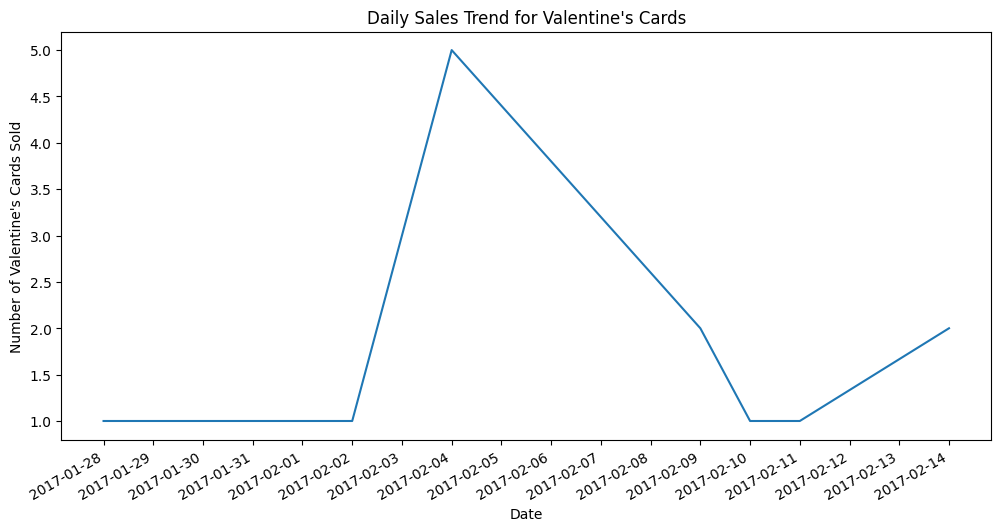

In [128]:
#22
# Filter transactions containing "Valentine's card"
valentines_card_transactions = data[data['Item'] == "Valentine's card"]

# Group by date and count transactions
valentines_sales_by_date = valentines_card_transactions.groupby('date')['Transaction'].count()


# Plot daily transaction trends for Valentine's card
plt.figure(figsize=(12, 6))
plt.plot(valentines_sales_by_date.index, valentines_sales_by_date.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Valentine\'s Cards Sold')
plt.title('Daily Sales Trend for Valentine\'s Cards')
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


From the Valentine card sales graph, it can be observed that sales spike in early February, peaking around February 4-5, indicating that many people begin buying cards a few days before Valentine's Day. After this peak, sales sharply decline as most people have already made their purchases. However, as Valentine's Day approaches on February 14, there is a slight increase in sales, likely from last-minute shoppers. This pattern reflects a typical trend in seasonal product sales, where demand rises leading up to the event and then gradually declines afterward, the highest demand occurs about 10 days before Valentine’s Day.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [129]:
# 24
# Group data by 'Transaction' and 'Item' and sum quantities
data['Quantity'] = data.groupby(['Transaction', 'Item'])['Item'].transform('count')

# Drop duplicate rows to keep only one entry for each item per transaction
data = data.drop_duplicates(subset=['Transaction', 'Item'])

# Create a pivot table to represent transactions
transaction_data = data.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)

# Display the first few rows of the transaction data
display(transaction_data.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
#25
# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-130-85c49d3072ca>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [131]:
# 26
from mlxtend.frequent_patterns import apriori, association_rules
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  branches.append(branch)


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [135]:
# 27
from mlxtend.frequent_patterns import apriori, association_rules
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=frequent_itemsets.shape[0]) # Added num_itemsets

# Display the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  branches.append(branch)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,1.0,0.000985,1.003306,0.050231,0.075908,0.003296,0.213884
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,1.0,0.005044,1.011905,0.176684,0.103745,0.011765,0.320679
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,1.0,0.002179,1.004841,0.148110,0.055905,0.004818,0.288707
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,1.0,0.001683,1.003749,0.109048,0.058333,0.003735,0.284542


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



The bakery's transaction trends indicate peak sales on weekends, particularly Saturday and Sunday, aligning with customers having more free time to enjoy baked goods. The busiest time is between 10 am and 12 pm, suggesting a mid-morning or lunchtime rush. Sales typically increase towards the end of the year, likely due to holiday seasons. Coffee, Bread, and Tea are the most popular items, maintaining steady demand throughout the day, while Cookies, Hot Chocolate, and Cakes see higher sales in the afternoon, catering to customers looking for afternoon treats. Valentine’s Cards experience a spike in sales around February 14, as expected. The Apriori algorithm reveals item pairings, like Coffee and Toast, which are frequently bought together, suggesting the potential for bundled offers or promotions. Based on these insights, recommendations include optimizing staffing and inventory during peak hours, creating bundled deals like Coffee and Toast, focusing on core offerings, leveraging seasonal occasions like Valentine’s Day for targeted marketing, and promoting afternoon items like Cookies and Cakes. By implementing these strategies, the bakery can improve its operations, offerings, and customer satisfaction.